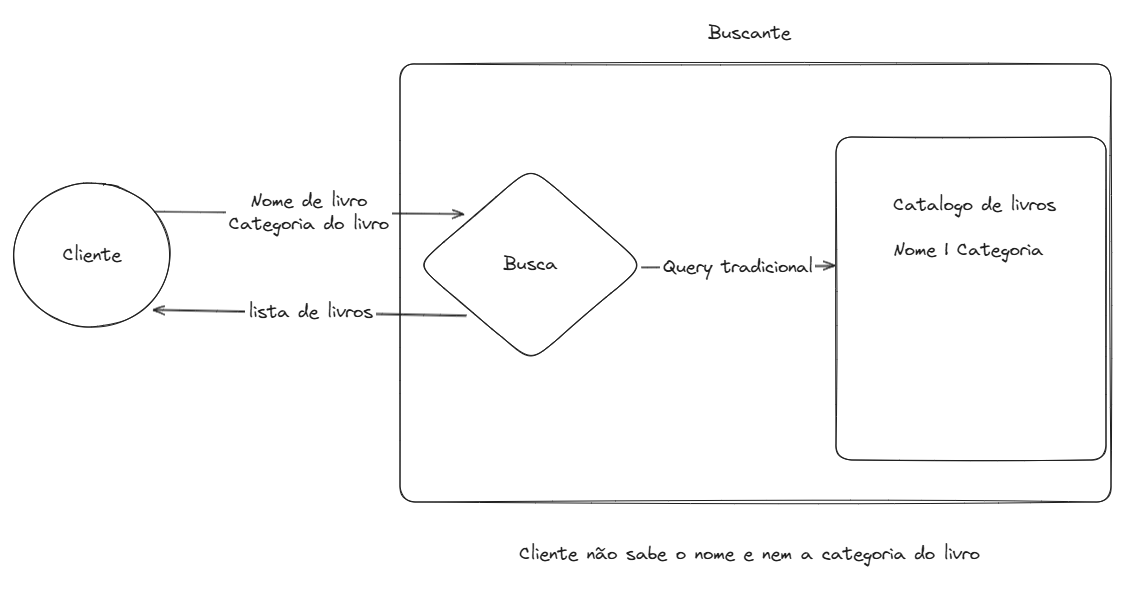

In [1]:
from google.colab import userdata
GROQ_API = userdata.get('GROQ_API')

In [2]:
!pip install -q llama-index llama-index-llms-groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.0/189.0 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.0 MB/s eta 0:00:00


In [3]:
from llama_index.llms.groq import Groq

llm = Groq(model="llama3-70b-8192", api_key=GROQ_API)

In [4]:
from llama_index.core.chat_engine import SimpleChatEngine

In [5]:
chat_engine = SimpleChatEngine.from_defaults(llm=llm)

In [6]:
chat_engine.chat_repl()

===== Entering Chat REPL =====
Type "exit" to exit.

Human: VOcÊ consegue me ajudar com duvidas literarias ?
Assistant: Eu estou aqui para ajudar!

Sim, posso ajudar com dúvidas literárias. Qual é o assunto ou obra literária que você gostaria de discutir? Você tem alguma pergunta específica sobre um livro, autor, estilo literário ou movimento literário?

Pode ser sobre:

* Análise de um livro ou poema específico
* Autor ou obra literária em particular
* Estilo literário ou movimento literário (ex: Modernismo, Romantismo, Realismo, etc.)
* Técnicas literárias (ex: simbolismo, ironia, etc.)
* Contexto histórico ou cultural de uma obra literária
* Ou qualquer outra coisa relacionada à literatura!

Sinta-se à vontade para fazer sua pergunta, e farei o meu melhor para ajudar!

Human: exit


In [7]:
llm.complete("Consegue me ajudar com duvidas literarias ?")

CompletionResponse(text='Eu estou aqui para ajudar!\n\nClaro que sim, posso ajudar com dúvidas literárias. Qual é o assunto ou obra literária que você gostaria de discutir? Você tem alguma pergunta específica sobre um livro, autor, estilo literário ou movimento literário?\n\nSe você precisar de ajuda com:\n\n* Análise de um texto ou obra literária\n* Explicação de um conceito ou estilo literário\n* Informações sobre um autor ou sua obra\n* Sugestões de leitura ou recomendações de livros\n* Discussão sobre temas ou tópicos literários\n\nou qualquer outra coisa relacionada à literatura, sinta-se à vontade para perguntar!\n\nEstou ansioso para ajudar e discutir literatura com você!', additional_kwargs={}, raw=ChatCompletion(id='chatcmpl-24f52f3a-c601-4e5a-b0a6-4288d53af4dd', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Eu estou aqui para ajudar!\n\nClaro que sim, posso ajudar com dúvidas literárias. Qual é o assunto ou obra literária

In [9]:
resposta = llm.complete("Consegue me ajudar com duvidas literarias ?").text

In [10]:
print(resposta)

Eu estou aqui para ajudar!

Sim, posso ajudar com dúvidas literárias. Qual é o tema ou obra literária que você gostaria de discutir? Você tem alguma pergunta específica sobre um autor, um livro, um estilo literário ou um movimento literário?

Se você precisar de ajuda com:

* Análise de um texto ou obra literária
* Interpretação de um personagem ou tema
* Contextualização histórica de uma obra literária
* Informações sobre um autor ou estilo literário
* Sugestões de leitura ou recomendações de livros

ou qualquer outra coisa relacionada à literatura, sinta-se à vontade para perguntar!

Estou ansioso para ajudar!


In [11]:
duvida_user = "Recomende livros de romance"

In [12]:
resposta = llm.complete(duvida_user).text
print(resposta)

Romance! Aqui vão algumas recomendações de livros de romance que você pode gostar:

**Clássicos**

1. "Pride and Prejudice" de Jane Austen - Um clássico do gênero que segue a história de Elizabeth Bennet e Mr. Darcy.
2. "Jane Eyre" de Charlotte Brontë - A história de uma jovem governanta que se apaixona pelo seu patrão, Mr. Rochester.
3. "Wuthering Heights" de Emily Brontë - Um romance trágico sobre a paixão entre Catherine e Heathcliff.

**Contemporâneos**

1. "The Notebook" de Nicholas Sparks - Uma história de amor que dura décadas, entre dois jovens que se conhecem em um verão.
2. "Me Before You" de Jojo Moyes - Uma história emocionante sobre uma jovem que se apaixona pelo seu paciente, um homem que sofreu um acidente.
3. "The Fault in Our Stars" de John Green - Um romance trágico sobre dois adolescentes que se conhecem em um grupo de apoio a pacientes com câncer.

**Romance Ligeiro**

1. "Eleanor Oliphant is Completely Fine" de Gail Honeyman - Uma história sobre uma mulher que enco

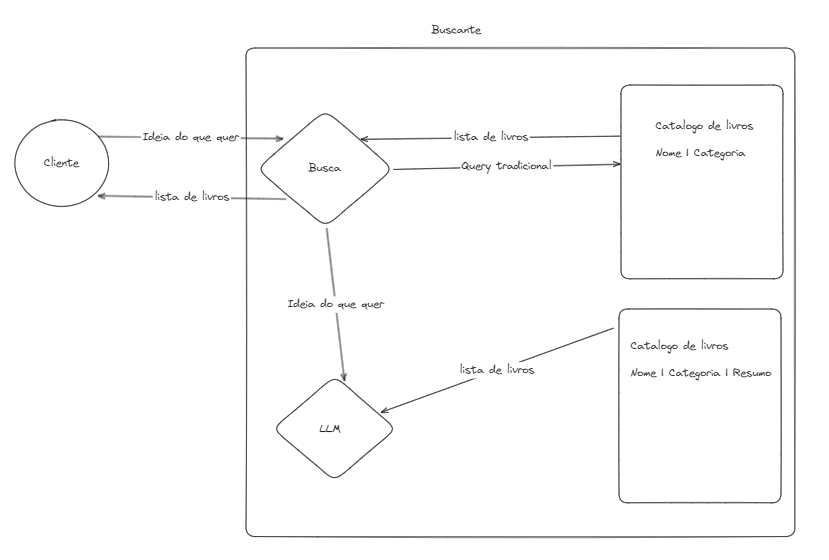

In [13]:
import pandas as pd

In [14]:
df = pd.read_csv('csv/livros_mais_vendidos.csv')

In [15]:
df.head()

,nome,categoria,sinopse,preco
0,É ASSIM QUE COMEÇA (EDIÇÃO DE COLECIONADOR),Romances,Todo final tem um começo. Agora em uma edição ...,"R$ 94,90"
1,TUDO É RIO,Romances,NaN,"R$ 71,39"
2,VERITY (EDIÇÃO DE COLECIONADOR),Suspenses,Um casal apaixonado. Uma intrusa. Três mentes ...,"R$ 79,90"
3,TÁTICAS DO AMOR,Romances,"Febre no TikTok, comédia romântica narra a ami...","R$ 65,89"
4,NEM TE CONTO,Romances,Da autora best seller do \n ...,"R$ 59,90"


In [16]:
prompt = "Só recomende livros dessa base de dados:"

In [17]:
for linha in df.values:
  prompt += "\n" + linha[0]

In [18]:
prompt

'Só recomende livros dessa base de dados:\nÉ ASSIM QUE COMEÇA (EDIÇÃO DE COLECIONADOR)\nTUDO É RIO\nVERITY (EDIÇÃO DE COLECIONADOR)\nTÁTICAS DO AMOR\nNEM TE CONTO\nO BEIJO DA NEVE\nQUARTA ASA\nVÉSPERA\nA MANDÍBULA DE CAIM\nEU E ESSE MEU CORAÇÃO\nFOGO & SANGUE – VOLUME 1\nJANTAR SECRETO\nIMPERFEITOS\nTUDO SOBRE O AMOR - NOVAS PERSPECTIVAS\nÉ ASSIM QUE ACABA\nUMA SEGUNDA CHANCE (FENÔMENO DO TIKTOK)\nA HORA DA ESTRELA\nIMPOSTORA: YELLOWFACE\nCHAMA DE FERRO\nA EMPREGADA ESTÁ DE OLHO (A EMPREGADA – LIVRO 3)\nA GUERRA DA PAPOULA VOL.1\nORAÇÃO PARA DESAPARECER\nUNICÓRNIOS - BORRACHAS DIVERTIDAS\nA BIBLIOTECA DA MEIA-NOITE\nA PACIENTE SILENCIOSA\nCOMECE PELO PORQUÊ\nCOMO CHEGAR AO SIM\nAS PRÁTICAS PARA A PROSPERIDADE DE O HOMEM MAIS RICO DA BABILÔNIA DE GEORGE S. CLASON\nSTORYBRAND\nO INVESTIDOR INTELIGENTE\nO JOGO INFINITO\nO MAIOR VENDEDOR DO MUNDO\nO MONGE E O EXECUTIVO\nANTIFRÁGIL (NOVA EDIÇÃO)\nMAESTRIA\nDEIXE DE SER POBRE\nESSENCIALISMO\nOS 5 DESAFIOS DAS EQUIPES\nRÁPIDO E DEVAGAR\nCALMA

In [19]:
resposta = llm.complete(prompt + duvida_user).text
print(resposta)

Aqui vão algumas recomendações de livros de romance baseadas na lista que você forneceu:

1. **É Assim que Começa** (edição de colecionador) - Um romance emocionante que explora a complexidade dos relacionamentos.
2. **Verity** (edição de colecionador) - Um thriller romântico que vai mantê-lo na borda do assento.
3. **Táticas do Amor** - Um romance leve e divertido que explora as estratégias do amor.
4. **Nem Te Conto** - Um romance emocionante que explora a complexidade dos relacionamentos.
5. **Eu e Esse Meu Coração** - Um romance emocionante que explora a complexidade dos relacionamentos.
6. **Jantar Secreto** - Um romance leve e divertido que explora as estratégias do amor.
7. **Imperfeitos** - Um romance emocionante que explora a complexidade dos relacionamentos.
8. **Tudo Sobre o Amor - Novas Perspectivas** - Um romance emocionante que explora a complexidade dos relacionamentos.
9. **É Assim que Acaba** - Um romance emocionante que explora a complexidade dos relacionamentos.
10. 

In [45]:
prompt = """
Somente responda em json
Formato resposta em json
[data:{
  "livros": [
    {
      "titulo": "Titulo do livro
      "categoria": "Categoria do livro"
      "Justificativa" "Porque recomenda"
    }
  ]
}]
Só recomende livros dessa base de dados:
"""

In [46]:
for linha in df.values:
  prompt += f"\n{linha[0]}"

In [47]:
entrada_user = "Recomende livros de romance"

In [48]:
resposta = llm.complete(prompt=prompt+entrada_user).text
print(resposta)

{
"data": {
"livros": [
{
"titulo": "É ASSIM QUE COMEÇA (EDIÇÃO DE COLECIONADOR)",
"categoria": "Romance",
"Justificativa": "Um romance emocionante e cheio de suspense que vai te manter na expectativa até o final."
},
{
"titulo": "VERITY (EDIÇÃO DE COLECIONADOR)",
"categoria": "Romance",
"Justificativa": "Um livro que vai te levar a uma jornada de amor, mentiras e segredos."
},
{
"titulo": "TÁTICAS DO AMOR",
"categoria": "Romance",
"Justificativa": "Um romance divertido e cheio de humor que vai te fazer rir e sonhar."
},
{
"titulo": "NEM TE CONTO",
"categoria": "Romance",
"Justificativa": "Um livro que vai te levar a uma jornada de amor e autoconhecimento."
},
{
"titulo": "UMA SEGUNDA CHANCE (FENÔMENO DO TIKTOK)",
"categoria": "Romance",
"Justificativa": "Um romance emocionante e cheio de suspense que vai te manter na expectativa até o final."
}
]
}
}


In [25]:
import json

In [26]:
resposta_json = json.loads(resposta)

In [31]:
resposta_json['data']['livros'][0]['titulo']

'É ASSIM QUE COMEÇA (EDIÇÃO DE COLECIONADOR)'

In [33]:
df.head()

,nome,categoria,sinopse,preco
0,É ASSIM QUE COMEÇA (EDIÇÃO DE COLECIONADOR),Romances,Todo final tem um começo. Agora em uma edição ...,"R$ 94,90"
1,TUDO É RIO,Romances,NaN,"R$ 71,39"
2,VERITY (EDIÇÃO DE COLECIONADOR),Suspenses,Um casal apaixonado. Uma intrusa. Três mentes ...,"R$ 79,90"
3,TÁTICAS DO AMOR,Romances,"Febre no TikTok, comédia romântica narra a ami...","R$ 65,89"
4,NEM TE CONTO,Romances,Da autora best seller do \n ...,"R$ 59,90"


In [35]:
for livro in resposta_json['data']['livros']:
  titulo = livro['titulo'].upper()

  if df.query("nome == @titulo").empty:
    print(f"Livro {titulo} não encontrado")

In [36]:
# livro_novo =    {'titulo': 'Não existe',
#       'categoria': 'Romance',
#       'Justificativa': 'Um romance que vai levar você a uma jornada emocionante pela cidade do Rio de Janeiro.'}

In [37]:
# resposta_json["data"]["livros"].extend([livro_novo])

In [39]:
# for livro in resposta_json['data']['livros']:
#   titulo = livro['titulo'].upper()

#   if df.query("nome == @titulo").empty:
#     print(f"Livro {titulo} não encontrado")

Livro NÃO EXISTE não encontrado
